Project Analysis

For this binary classification problem, I decided to choose from Naive Bayes and SVM.
Because dataset is highly correlated, it would not be rational to use Random Forest or Decision Trees 
as they cannot work to full potential with multicollinearity.


In [ ]:
import pandas, numpy
import matplotlib.pyplot as plt 
import seaborn as sns
import constants
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [35]:
feature_dataset = pandas.read_csv("ready_dataset.csv").drop(columns=['client_id', 'Unnamed: 0'])
feature_dataset.head(100)

,has_car,has_realty,income_category,education_category,married,living_place,has_mobile_phone,has_work_phone,has_phone,has_email,...,employed,exp_applicant,bad_client,Female,Male,total_children,age,annual_income,family_size,number_of_apps
0,True,True,4,1,True,4,True,True,True,True,...,True,False,False,False,True,-0.580439,0.239169,0.757090,-0.215761,0.0
1,False,True,4,3,False,4,True,False,False,False,...,True,False,False,True,False,0.816766,-1.165751,-0.687067,-0.215761,0.0
2,True,True,0,3,True,4,True,False,True,False,...,True,False,False,False,True,-0.580439,1.117244,-0.687067,-0.215761,0.0
3,True,True,0,3,True,4,True,False,True,False,...,True,False,False,False,True,-0.580439,1.117244,-0.687067,-0.215761,0.0
4,True,True,0,3,True,4,True,False,True,False,...,True,False,False,False,True,-0.580439,1.117244,-0.687067,-0.215761,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,False,4,1,True,5,True,True,False,False,...,True,False,False,False,True,-0.580439,-1.341366,-0.191927,-0.215761,0.0
96,True,False,0,1,True,4,True,True,False,False,...,True,False,False,False,True,2.213972,-0.199868,2.201246,2.025300,0.0
97,False,True,1,3,True,4,True,False,True,False,...,False,False,False,True,False,-0.580439,1.380667,-0.274450,-0.215761,0.0
98,False,True,1,3,True,4,True,False,True,False,...,False,False,False,True,False,-0.580439,1.380667,-0.274450,-0.215761,0.0


Correlation between features

<Axes: >

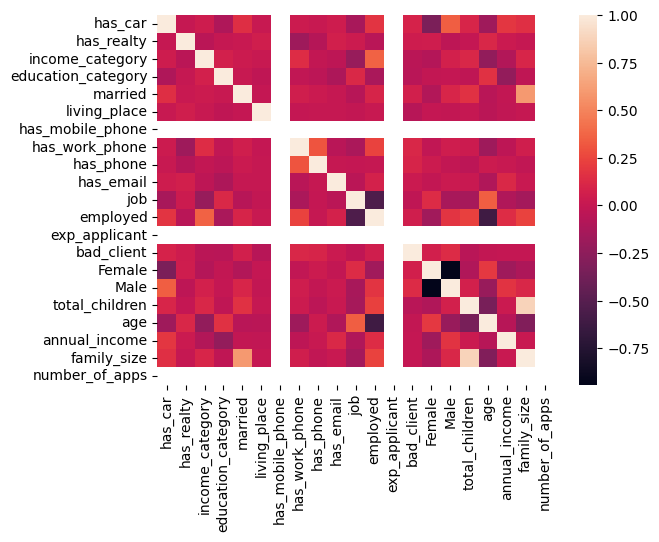

In [38]:
sns.heatmap(feature_dataset.corr())

In [36]:
# Splitting data into training, testing and validation sets 
from sklearn.model_selection import train_test_split 

def split_data(feature_dataset):
    
    x_set, y_set = feature_dataset.drop(columns=["bad_client"], inplace=False), feature_dataset['bad_client']

    # Splitting into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(
    x_set, y_set, test_size=0.2, stratify=y_set, random_state=1)

    # Splitting into training and validation sets 
    x_train, validation_x_set, y_train, validation_y_set = train_test_split(
    x_train, y_train, test_size=0.4, stratify=y_train, random_state=1)

    x_train, x_hyper_testing, y_train, y_hyper_testing = train_test_split(
        x_train, y_train, test_size=0.5, stratify=y_train, random_state=1
    )
    return (x_train, y_train), (x_test, y_test), (x_hyper_testing, y_hyper_testing), (validation_x_set, validation_y_set)

training_set, test_set, hyper_testing_set, validation_set = split_data(feature_dataset)

In [37]:
len(training_set[0])

113696

Feature Selection using various methods (ANOVA, RFE, Permutation Importance)

In [23]:
test_models = {
    'b_naive_bayes': BernoulliNB(),
    'g_naive_bayes': GaussianNB(),
    'svm': SVC()
}

In [24]:
feature_importances = {}

Feature Selection for Naive Bayes (Bernoulli)

Feature Selection for Naive Bayes (Gaussian)

Feature Selection for Support Vector Machine Classifier

In [32]:
from sklearn.feature_selection import RFECV 

def extract_using_rfe(x_train, y_train, model):
    # initializing estimator for KNN Algorithm
    estimator = RFECV(
        estimator=model, 
        step=2, min_features_to_select=5,
        cv=StratifiedKFold(n_splits=5),
        scoring='accuracy',
    )

    # fitting the model 
    estimator.fit(x_train, y_train)
    
    features_idxs = list(
        filter(
            lambda feature: estimator.support_[feature] == True,
            range(len(x_train.columns))
        )
    )
    feature_func = (lambda feature: x_train.columns[feature])
    res = {
        'features': feature_func(features_idxs),
        'metrics': numpy.mean(estimator.cv_results_['mean_test_score'])    
    }
    feature_importances[model] = res

for model in ['decision_tree', 'random_forest']:
    print('finding features for %s algorithm....' % model)
    extract_using_rfe(
        x_train=training_set[0],
        y_train=training_set[1],
        model=test_models[model]
    )

feature_importances


finding features for decision_tree algorithm....
finding features for random_forest algorithm....


{DecisionTreeClassifier(): {'features': Index(['has_car', 'has_realty', 'income_category', 'education_category',
         'married', 'has_work_phone', 'has_phone', 'job', 'Female', 'Male',
         'total_children', 'age', 'annual_income', 'family_size'],
        dtype='object'),
  'metrics': {'mean_test_score': array([0.98148573, 0.98167043, 0.98462565, 0.98810865, 0.98893541,
          0.98930482, 0.98923445, 0.98923445, 0.98910252]),
   'std_test_score': array([0.00093145, 0.00098691, 0.00231596, 0.00075477, 0.00066311,
          0.00088362, 0.00080674, 0.00081059, 0.00080294]),
   'split0_test_score': array([0.98038698, 0.98082674, 0.98720317, 0.98742304, 0.9882146 ,
          0.98887423, 0.98883026, 0.98905013, 0.98905013]),
   'split1_test_score': array([0.98183737, 0.98210124, 0.9872026 , 0.98847795, 0.98970931,
          0.99032499, 0.98962136, 0.99023704, 0.9899292 ]),
   'split2_test_score': array([0.98056203, 0.98091385, 0.98346453, 0.98707067, 0.98878579,
          0.988389

In [239]:
# Selecting models and apply hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, log_loss


models = {
    "decision_tree": DecisionTreeClassifier,
    'random_forest': RandomForestClassifier,
}

models_hyper_information = {

    "decision_tree": {
        'max_depth': numpy.array([2, 3, 5, 10, 20]),
        'min_samples_leaf': numpy.array([5, 10, 20, 50, 100]),
        'criterion': ["gini", "entropy"],
    },
    'random_forest': {
        
        'n_estimators': numpy.array([5, 20, 50, 100]),

        'max_features': ['sqrt'],

        'max_depth': numpy.arange(10, 20, 10),

        'min_samples_split': numpy.array([2, 6, 10]),

        'min_samples_leaf': numpy.array([1, 3, 4]),

        'bootstrap': [True, False],
    }

}

optimal_hyper_parameters = {model: {} for model in models.keys()} 

loss_function = make_scorer(log_loss, greater_is_better=False, needs_proba=True)


def apply_informed_search_cv(
    x_set: pandas.DataFrame, 
    y_set: pandas.Series, 
    model_name: str, 
    hyperparams: typing.Dict,
    error_score,
    folds=10
):
    """
    Function applies HyperParameter Tuning using InformedSearch, based on Bayesian Search
    
    Args:
        1. x_set: pandas.DataFrame object, represents set of independent features,
        2. y_set: pandas.Series object, represents target feature,
        3. model: Machine Learning Model for tuning,
        4. folds: number of splits for cross-validation,
        5. hyperparams: default hyperparams of the model
        6. metric: priority metric for the model
        7. error_score: Scoring Function for error
    """
    
    if not len(x_set) or not len(y_set):
        raise ValueError("X or Y datasets are empty")
        
    new_cvs = GridSearchCV(
        estimator=models[model_name](),
        param_grid=hyperparams,
        scoring=error_score,
        cv=StratifiedKFold(n_splits=folds),
        error_score="raise",
        n_jobs=-1,
    )
    new_cvs.fit(x_set, y_set)
    
    # the lower loss score is, the better model performs 
    
    optimal_hyper_parameters[model_name]["params"] = new_cvs.best_params_
    optimal_hyper_parameters[model_name]["loss_score"] = new_cvs.best_score_
    
    
# Applying Hyperparameter tuning for each model

for model in models.keys():
    try:
        print('training %s...' % (model))
        apply_informed_search_cv(
            x_set=training_set[0],
            y_set=training_set[1],
            model_name=model,
            folds=10,
            hyperparams=models_hyper_information[model],
            error_score=loss_function,
        )
    except(KeyError) as err:
        raise NotImplemented

# Applying Hyperparameter Tuning for each model in the dataset

optimal_models = {
    model_name: models[model_name](**optimal_hyper_parameters[model_name]["params"])
    for model_name in models.keys()
}

optimal_hyper_parameters

training knn...
training decision_tree...
training random_forest...


{'knn': {'params': {'metric': 'manhattan',
   'n_neighbors': 19,
   'weights': 'uniform'},
  'loss_score': -0.42339764104353916},
 'decision_tree': {'params': {'criterion': 'gini',
   'max_depth': 20,
   'min_samples_leaf': 50},
  'loss_score': -0.38160939882342126},
 'random_forest': {'params': {'bootstrap': False,
   'max_depth': 10,
   'max_features': 'sqrt',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100},
  'loss_score': -0.33198764680368625}}

In [209]:
# let's explore each model on different decision thresholds 

from sklearn.metrics import precision_recall_curve, auc


def evaluate_precision_recall_tradeoff(model, X_data, Y_data):
    """
    Functions evaluates tradeoff between precision and recall, 
    based on model's performance
    
    Args:
        model: Machine Learing Classifier for evaluation 
        X_data: feature set of dependent features
        Y_data: independent feature
        
    Returns:
        precision: precision scores of the model
        recall: - recall scores of the model
        auc_scr: auc scores
        thresholds: decision thresholds used for each individual training
    """
    x_tr, x_t, y_tr, y_t = train_test_split(X_data, Y_data, test_size=0.5, random_state=1)
    
    model.fit(x_tr, y_tr)
    y_pred_proba = model.predict_proba(x_t)[:, 1] # positive class prediction proba
    precision, recall, thresholds = precision_recall_curve(y_t, y_pred_proba)
    auc_scr = auc(recall, precision)
    return precision, recall, auc_scr, thresholds

def get_auc_score(y_test, y_pred):
    return auc(y_test, y_pred)

def visualize_pr_tradeoff(precision, recall, auc_score):
    """
    Visualizes Precision-Recall Tradeoff using plot
    """
    plt.plot(recall, precision, label='Precision-Recall Curve (AUC = %0.2f)' % auc_score)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()


In [210]:
# also, let's add functionality for interpolating threshold using scipy library

from scipy.interpolate import interp1d

def interpolate_threshold(desired_precision: int, actual_precision, actual_recall) -> float:
    """
    Function performs linear interpolation using scipy library 
    for predicting decision threshold value
    
    Args:
        desired_precision: int - percentage of desired precision 
        actual_precision: array of precision values 
        actual_recall: array of recall values
        
    Returns:
        estimated threshold float value
    """
    inter_function = interp1d(actual_precision, actual_recall)
    est_threshold = inter_function(desired_precision)
    return est_threshold


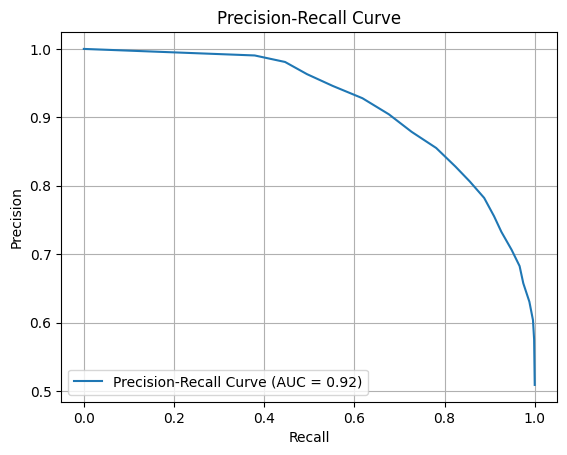

In [252]:
# evaluating thresholds for KNN 

model = optimal_models["knn"]

precision, recall, auc_score, thresholds = evaluate_precision_recall_tradeoff(
    model, validation_set[0], validation_set[1]
)
        
visualize_pr_tradeoff(precision, recall, auc_score)

In [1]:
# predicting desired precision for our model 
desired_precision = 0.65
knn_threshold = interpolate_threshold(desired_precision, precision, recall)

print(knn_threshold)

NameError: name 'interpolate_threshold' is not defined

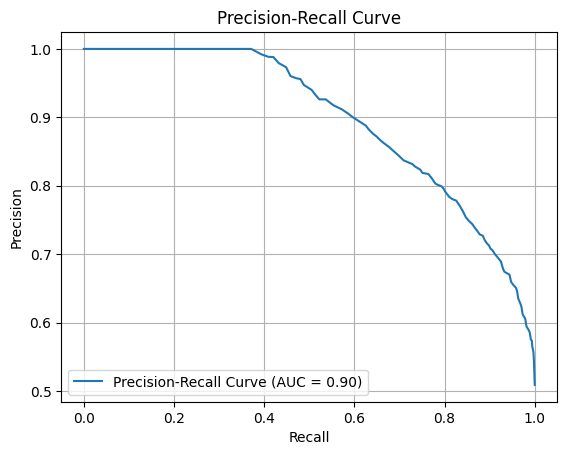

In [242]:
# let's visualize Decision Tree 
# evaluating thresholds for KNN 


model = optimal_models["decision_tree"]

precision, recall, auc_score, thresholds = evaluate_precision_recall_tradeoff(
    model, validation_set[0], validation_set[1]
)
        
visualize_pr_tradeoff(precision, recall, auc_score)


In [243]:
# Let's calculate threshold for Decision Tree 

desired_precision = 0.6
dt_threshold = interpolate_threshold(desired_precision, precision, recall)

print(dt_threshold)

0.9802704352822738


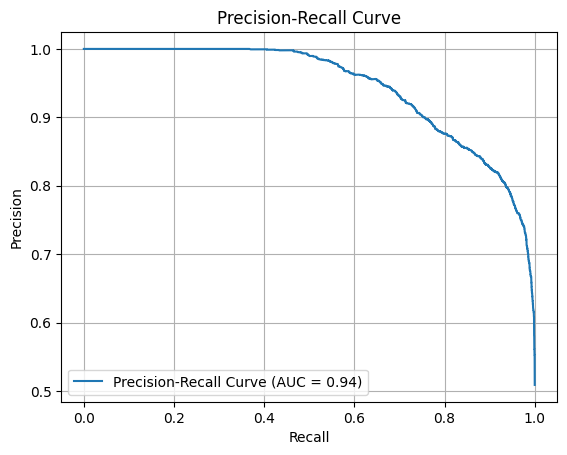

In [244]:
# evaluating thresholds for Random Forest

model = optimal_models["random_forest"]

precision, recall, auc_score, thresholds = evaluate_precision_recall_tradeoff(
    model, validation_set[0], validation_set[1]
)
        
visualize_pr_tradeoff(precision, recall, auc_score)

In [245]:
from sklearn.model_selection import cross_validate 

scorers = ["precision", "recall", "accuracy"]
metrics = {} 

for model in optimal_models.keys():
    scores = cross_validate(
        estimator=optimal_models[model],
        X=validation_set[0],
        y=validation_set[1],
        scoring=scorers
    )
    metrics[model] = {
        "precision_score": numpy.mean(scores['test_precision']),
        "recall_score": numpy.mean(scores['test_recall']),
        "accuracy": numpy.mean(scores["test_accuracy"])
    }

metrics

{'knn': {'precision_score': 0.8058856061770301,
  'recall_score': 0.8875844898179803,
  'accuracy': 0.8368407135567676},
 'decision_tree': {'precision_score': 0.8005833276030193,
  'recall_score': 0.8070199181114279,
  'accuracy': 0.8029528328027954},
 'random_forest': {'precision_score': 0.8441852697687908,
  'recall_score': 0.8621265354107266,
  'accuracy': 0.8514299689787311}}

In [255]:
# let's apply cross-validation and see how it performs on data

from sklearn.model_selection import cross_validate 
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score
)

X_data, Y_data = validation_set[0], validation_set[1]

def cross_validate_with_threshold(cv, model_name, X_train, Y_train):

    model = optimal_models[model_name]
    precision_scores, recall_scores, accuracy_scores = [], [], []

    for train_index, test_index in cv.split(test_set[0], test_set[1]):

        X_train, X_test = test_set[0].iloc[train_index], test_set[0].iloc[test_index]
        Y_train, Y_test = test_set[1].iloc[train_index], test_set[1].iloc[test_index]
        
        # fitting model 
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        
        probs = numpy.array(model.predict_proba(X_test))[:, 1] # positive class prediction 

        # Applying threshold
        y_transformed = (probs >= dt_threshold).astype(int)

        precision = precision_score(Y_test, y_transformed, average='binary', zero_division=1)
        recall = recall_score(Y_test, y_transformed, average='binary', zero_division=1)
        accuracy = accuracy_score(Y_test, y_transformed)

        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    prec = sum(precision_scores) / len(precision_scores)
    rec = sum(recall_scores) / len(precision_scores)
    acc = sum(accuracy_scores) / len(accuracy_scores)

    print(model_name)
    print('precision-score', prec)
    print('recall-score', rec)
    print('accuracy-score', acc)


for model_name in optimal_models.keys():
    cross_validate_with_threshold(
        model_name=model_name,
        cv=StratifiedKFold(n_splits=5),
        X_train=X_data,
        Y_train=Y_data,
    )

knn
precision-score 0.9900891166905408
recall-score 0.4843413410623169
accuracy-score 0.7397204639634065
decision_tree
precision-score 0.9979306466051439
recall-score 0.40196661476066564
accuracy-score 0.700554565389337
random_forest
precision-score 1.0
recall-score 0.16712027257704293
accuracy-score 0.5835456715308646


In [258]:
feature_dataset.columns

Index(['Male', 'has_car', 'Married', 'Female', 'has_realty', 'bad_client',
       'credit_window', 'annual_income', 'total_children'],
      dtype='object')

In [257]:
# saving machine learning model using pickle 
import pickle 
model = optimal_models["knn"]
pickle.dump(model, open("classifier.pkl", mode="wb"))